In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV 
from sklearn.metrics import mean_squared_error

# Suppress warnings
import warnings
warnings.filterwarnings("ignore")


In [78]:
# Load data
train = pd.read_csv('DailyDelhiClimateTrain.csv')
test = pd.read_csv('DailyDelhiClimateTest.csv')

# Set date as index
train = train.set_index('date')
test = test.set_index('date')

# Convert index to datetime
train.index = pd.to_datetime(train.index)
test.index = pd.to_datetime(test.index)

# Add month, year, and day columns
for df in [train, test]:
    df['month'] = df.index.month
    df['year'] = df.index.year
    df['day'] = df.index.dayofyear

# Prepare data for training
X_train = train.loc[:, ['day', 'month', 'year']]
y_train = train['meantemp']
X_test = test.loc[:, ['day', 'month', 'year']]
y_test = test['meantemp']


In [79]:
# Train Random Forest model
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)

# Define grid search parameters
param_grid = {
    'max_depth': [None, 3, 6, 9],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform grid search
grid_search = GridSearchCV(estimator=rf_reg, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Print best parameters
print("Best parameters:", grid_search.best_params_)

# Get the best model
best_rf = grid_search.best_estimator_


Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best parameters: {'max_depth': 6, 'min_samples_leaf': 4, 'min_samples_split': 10}


In [80]:
# Predictions
y_pred_train = best_rf.predict(X_train)
y_pred_test = best_rf.predict(X_test)


In [81]:
# Evaluate the model
train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)

print("Train MSE:", train_mse)
print("Test MSE:", test_mse)


Train MSE: 3.154045989915433
Test MSE: 8.017773275355944


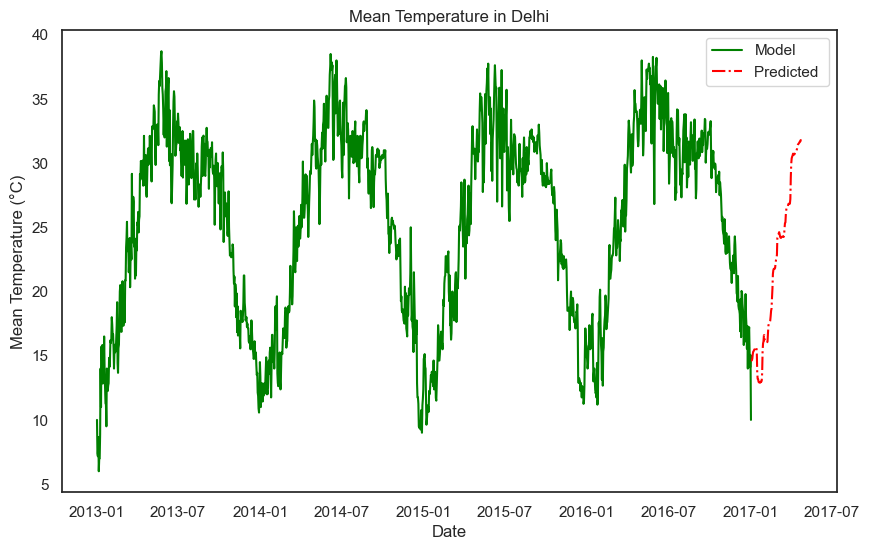

In [85]:
# Plotting graphs for train and test data
plt.figure(figsize=(10, 6))

# Plot training data
plt.plot(train.index, y_train, label='Model', color='green', linestyle='-')


# Plot predicted values for testing data
plt.plot(test.index, y_pred_test, label='Predicted ', color='red', linestyle='-.')

plt.title('Mean Temperature in Delhi')
plt.xlabel('Date')
plt.ylabel('Mean Temperature (°C)')
plt.legend()
plt.show()
